In [1]:
# Do not edit the codes in this cell
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
# load dataset
x, y = load_iris(return_X_y=True)

In [2]:
# Do not edit the codes in this cell
# We use 100 samples and 2 features for logistic regression function
x_lr = x[:100, :2] # class 0 and 1 balanced
y_lr = y[:100]

accuracy is 100.0%


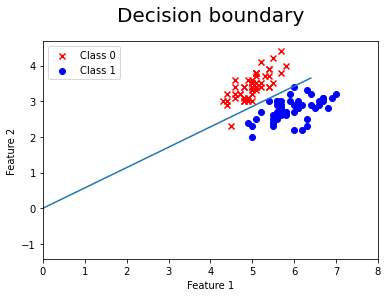

In [6]:
# Train Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_lr, y_lr, train_size=0.8)

def sigmoid(theta, features_X):
    z = np.dot(features_X, theta)
    s = 1 / (1 + np.exp(-z)) 
    return s

def cost(theta, X, y):
    hypothesis = sigmoid(theta,X)
    cost_value = (-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)).mean()
    return cost_value

def gradient(theta, X, y):
    hypothesis = sigmoid(theta,X)
    grad_desc = np.dot(X.T, (hypothesis - y)) / y.shape[0] 
    return grad_desc

def predict(theta, X):
    predict_probabilities = sigmoid(theta,X)
    predict_labels = [1 if prob > 0.5 else 0 for prob in predict_probabilities]
    return predict_labels

def accurate(predictions, y):
    accuracy_score = np.sum(y == predictions)/len(y) * 100 
    return accuracy_score

# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    fig, ax = plt.subplots()
    #ax.set_ylim(ymin=0,ymax=5)
    ax.set_xlim(xmin=0,xmax=8)
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x[ix,0], x[ix,1], label = g, marker=['x','o'][g],c = ['red','blue'][g])
    ax.legend(['Class 0', 'Class 1'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision boundary',size='20',pad='20')
    plot_x = ([min(x[:,1]) - 4, max(x[:,1]) + 2])
    plot_y =((-1/final_theta[1]) * (np.dot((final_theta[0]),(plot_x)) ))
    plt.plot(plot_x, plot_y)
    plt.show()

# print (final_theta)

from scipy import optimize as opt
# x_lr = np.concatenate((np.array([np.ones(len(y_lr))]).T, x), axis=1)
# theta = np.zeros(x.shape[1])
theta = np.zeros(x_lr.shape[1])
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X_train, y_train))
final_theta = result[0]
final_cost = cost(final_theta, X_train, y_train)
predictions = predict(final_theta, X_test)
accuracy = accurate(predictions, y_test)
# print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy) + "%")
# print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

draw_decision_boudary(final_theta, x_lr, y_lr)